<h2>Web Crawling </h2>

In [1]:
# 필요한 라이브러리 설치
!pip install beautifulsoup4
!pip install requests
!pip install wordcloud
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import re

<h3>필요한 tag알아내기</h3>

In [3]:
# URL 설정
url = 'https://namu.wiki/w/%EC%97%90%EB%AF%B8%EB%84%B4'

# 페이지 요청 및 파싱
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 본문 태그의 내용만 크롤링
paragraphs = soup.find_all("div",class_="wiki-heading-content")
content = ' '.join([para.get_text() for para in paragraphs])

# '개요' 단어 이후의 모든 'div wiki-link-internal' 태그 내의 링크 추출
start=soup.find(string="개요")
internal_link = start.find_all_next("a",class_="wiki-link-internal")
links = [a['href'] for a in internal_link[:100]]

In [4]:
#soup

<!DOCTYPE html>

<html lang="ko"><head><meta charset="utf-8"/>
<meta content="user-scalable=no, initial-scale=1, width=device-width, viewport-fit=cover" name="viewport"/>
<title>에미넴 - 나무위키</title>
<meta content="ie=edge" http-equv="x-ua-compatible"/>
<meta content="the seed" name="generator"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="나무위키" name="application-name"/>
<meta content="나무위키" name="msapplication-tooltip"/>
<meta content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8" name="msapplication-starturl"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="에미넴" property="og:title"/>
<meta content="나무위키" property="og:site_name"/>
<meta content="//i.namu.wiki/i/bAP5i_T4BvqEzUX8IENtBEGuOsRl2HA0mRWjavmz0FWe4jIVq3qbEuJtm9zm__QiDv2awOleb8JzcYU2dtPe6nZNqFg23DriTWCSXnWOlZjoq4yfVOqBabuytsVB8qW92Gsxn8d41Lvbbf9ls3RKZQ.webp" property="og:image"/>
<meta content="파일:SlimShadyLPat0_Getty_Ringer.0.jpg 미국   디트로이트  출신 출생 지역은  세인트조" property="o

<h2> 문제점 </h2>
메모리 문제  

한국어 필터링의 문제(영어와 다르게 조사가 붙음) ->외부 라이브러리 이용  
사람들이 함께 만들어나가는 식이다보니 형식이 일정하지 않음. 문서마다 태그 처리가 다른 경우가 있음.

<h1>과제 코드</h1>

나무위키 도메인의 이름, 주소

1.로스앤젤레스 - 나무위키
https://namu.wiki/w/%EB%A1%9C%EC%8A%A4%EC%95%A4%EC%A0%A4%EB%A0%88%EC%8A%A4  


2.에미넴 - 나무위키
https://namu.wiki/w/%EC%97%90%EB%AF%B8%EB%84%B4

In [2]:
!pip install konlpy
from konlpy.tag import Okt
from collections import Counter

In [3]:
# 불필요한 키워드 필터링
# file downloaded from https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a
ko_stopwords_path = "stopwords-ko.txt"

with open(ko_stopwords_path, encoding='utf-8') as f:
    stopwords= f.readlines()
stopwords = [x.strip() for x in stopwords]

# add my stopwords
my_stopwords = ['통해','또한','있다','대해', '한다','있다','했다','이후','그리고','대한',
                '있는','적이','것도','하고','상당히','없는','있지만','있는데','당시','자신의','볼','있으며', '실제로','것을','아닌','인해','그냥','등이', '아니라',
                '이전', '역사','문단','이전','주로','것이','된다','있고',
                '상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장', '많은','많이','역시','위해','다시','그의','등의',
                '줄거리', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물','나는','나의','내가','이는','것이다',
                '이름', '년월','문서의','같은','특히','하는','문서를의','문단을의','것은','펼치기','접기','것은','자세한','내용은','부분을','참조하십시오','참고하십시오']
for stopword in my_stopwords:
    stopwords.append(stopword)

In [11]:
def wordcloud_for_articles(url, wordcloud_title):
    # 페이지 요청 및 파싱
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')


    # 본문 태그의 내용만 크롤링
    paragraphs = soup.find_all("div", class_="wiki-heading-content")

    content = ' '.join([para.get_text() for para in paragraphs])
    # Remove punctuation from content
    content = re.sub(r'[^\w\s]', '', content) 
    # stopword 필터링
    filtered_content = ' '.join([word for word in content.split() if word not in stopwords])
    byte_content = bytearray(filtered_content, 'utf-8') # memory error 방지

    # '개요' 단어 이후의 모든 'div wiki-link-internal' 태그 내의 링크 추출
    start=soup.find(string="개요")
    internal_link = start.find_all_next("a",class_="wiki-link-internal")
    links = [a['href'] for a in internal_link[:100]]

    # 추출한 링크 내용 크롤링
    for url in links:
        response = requests.get(f'https://namu.wiki/'+url)
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all("div",class_="wiki-heading-content")
        content = ' '.join([para.get_text() for para in paragraphs])
        content = re.sub(r'[^\w\s]', '', content) # Remove punctuation from content
        filtered = ' '.join([word for word in content.split() if word not in stopwords])
        # This code prevents memory error
        tmp = bytearray(filtered, 'utf-8')
        byte_content.extend(tmp)

    # decode
    filtered_result = byte_content.decode()
    
    # konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(filtered_result)
    count = Counter(nouns)
    # count중 길이가 1인 단어 제거 
    # 예: '더', '은','는', '를', '의', '이','가','을','한','중','등','수','때','된','그','후','다','및','판','번','잘','할'
    removed_content= ' '.join([x for x in count if len(x) > 1])
    # 어떤 단어가 몇 번 나오는지 알기 위해 추가
    removed_counter = Counter({x : count[x] for x in count if len(x) > 1})
    
    # 한글 폰트 경로 설정 (나눔고딕 폰트 사용)
    font_path = 'NanumSquareOTF_acB.otf'


    mask = np.array(Image.open('oval_shape.jpg'))
    # Word Cloud 생성
    wordcloud = WordCloud(font_path=font_path, width=1000, height=500, background_color='white', mask=mask).generate(removed_content)
    
    # Word Cloud 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(wordcloud_title)
    plt.show()

    # 링크 출력
    print("Extracted Links:")
    for link in links:
        print(link)
        
    return removed_counter

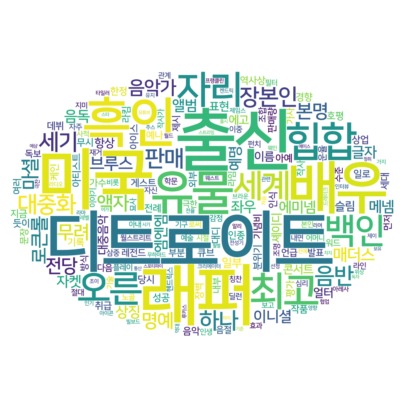

Extracted Links:
/w/%EB%AF%B8%EA%B5%AD
/w/%EB%94%94%ED%8A%B8%EB%A1%9C%EC%9D%B4%ED%8A%B8
/w/%EB%9E%98%ED%8D%BC
/w/%EB%B0%B0%EC%9A%B0
/w/%ED%9D%91%EC%9D%B8
/w/%ED%9E%99%ED%95%A9
/w/%EB%B0%B1%EC%9D%B8
/w/%EB%A1%9C%ED%81%B0%EB%A1%A4%20%EB%AA%85%EC%98%88%EC%9D%98%20%EC%A0%84%EB%8B%B9
/w/EGOT
/w/Mathers
/w/%EC%96%BC%ED%84%B0%20%EC%97%90%EA%B3%A0
/w/%EB%8C%80%EC%A4%91%EC%9D%8C%EC%95%85
/w/%ED%9E%99%ED%95%A9
/w/%ED%9E%99%ED%95%A9
/w/%EA%B2%8C%EC%8A%A4%ED%8A%B8
/w/%EB%9D%BC%ED%82%B4
/w/%EB%B9%85%20%EB%8C%80%EB%94%94%20%EC%BC%80%EC%9D%B8
/w/%EC%95%84%EC%9D%B4%EC%8A%A4%20%ED%81%90%EB%B8%8C
/w/Andre%203000
/w/Redman
/w/LL%20Cool%20J
/w/Run%20DMC
/w/%EB%9D%BC%ED%82%B4
/w/%EB%B9%85%20%EB%8C%80%EB%94%94%20%EC%BC%80%EC%9D%B8
/w/%EC%BF%A8%20%EC%A7%80%20%EB%9E%A9
/w/BBC
/w/%EB%B0%A5%20%EB%94%9C%EB%9F%B0
/w/%EC%9B%94%EC%8A%A4%ED%8A%B8%EB%A6%AC%ED%8A%B8%20%EC%A0%80%EB%84%90
/w/%EC%97%98%ED%8A%BC%20%EC%A1%B4
/w/%EC%A7%80%EB%AF%B8%20%ED%97%A8%EB%93%9C%EB%A6%AD%EC%8A%A4
/w/%EB%AF%B9%20%EC%9E%AC%EA%B1%B0
/w/%

In [12]:
eminem_word_result = wordcloud_for_articles("https://namu.wiki/w/%EC%97%90%EB%AF%B8%EB%84%B4", "eminem.pdf")

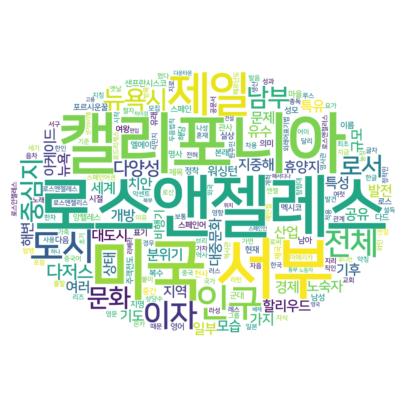

Extracted Links:
/w/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84
/w/%EB%AF%B8%EA%B5%AD
/w/%EB%89%B4%EC%9A%95%EC%8B%9C
/w/LA%20%EB%8B%A4%EC%A0%80%EC%8A%A4
/w/%ED%95%A0%EB%A6%AC%EC%9A%B0%EB%93%9C
/w/%EC%84%B8%EA%B3%84%EB%8F%84%EC%8B%9C
/w/%EC%A7%80%EC%A4%91%ED%95%B4%EC%84%B1%20%EA%B8%B0%ED%9B%84
/w/%EB%89%B4%EC%9A%95
/w/%EC%9B%8C%EC%8B%B1%ED%84%B4%20D.C.
/w/%EC%83%8C%ED%94%84%EB%9E%80%EC%8B%9C%EC%8A%A4%EC%BD%94
/w/%EC%8A%A4%ED%8E%98%EC%9D%B8%EC%96%B4
/w/%EC%B2%9C%EC%82%AC
/w/%EC%A0%95%EA%B4%80%EC%82%AC
/w/%EC%98%81%EC%96%B4
/w/the
/w/%EC%8A%A4%ED%8E%98%EC%9D%B8%20%EC%A0%9C%EA%B5%AD
/w/%EC%A3%BC%EA%B0%9D%EC%A0%84%EB%8F%84
/w/%EC%97%94%EC%A0%A4
/w/%EB%9D%BC%ED%8B%B4%20%EC%95%84%EB%A9%94%EB%A6%AC%EC%B9%B4
/w/%EA%B0%80%EC%B0%A8
/w/%EB%82%98%EC%84%B1
/w/%EB%91%90%EC%9D%8C%EB%B2%95%EC%B9%99
/w/%EC%A4%91%EA%B5%AD
/w/%ED%95%9C%EA%B5%AD%20%ED%95%9C%EC%9E%90%EC%9D%8C
/w/%EB%82%98%EC%84%B1%EC%97%90%20%EA%B0%80%EB%A9%B4
/w/%EC%8A%A4%ED%8E%98%EC%9D%B8%20%EC%A0%9C%EA%B5%AD
/w/1781%EB%85%84
/w/%EC%95%

In [13]:
la_word_result = wordcloud_for_articles("https://namu.wiki/w/%EB%A1%9C%EC%8A%A4%EC%95%A4%EC%A0%A4%EB%A0%88%EC%8A%A4", "la.pdf")

In [14]:
eminem_word_result

Counter({'미국': 1607,
         '흑인': 1346,
         '사람': 869,
         '앨범': 863,
         '디트로이트': 769,
         '음악': 655,
         '경우': 644,
         '마약': 638,
         '힙합': 600,
         '한국': 590,
         '에미넴': 576,
         '정도': 552,
         '지역': 538,
         '백인': 527,
         '영상': 493,
         '사용': 481,
         '시작': 450,
         '래퍼': 439,
         '문제': 433,
         '발매': 426,
         '도시': 406,
         '인종': 399,
         '자살': 376,
         '세계': 370,
         '속령': 370,
         '권총': 369,
         '행정구': 362,
         '현재': 352,
         '관련': 345,
         '생각': 334,
         '국가': 329,
         '영화': 328,
         '개인': 321,
         '인구': 312,
         '이름': 304,
         '알리': 303,
         '사회': 300,
         '활동': 299,
         '대표': 292,
         '대부분': 291,
         '공연': 290,
         '때문': 287,
         '가사': 284,
         '이유': 283,
         '드레': 283,
         '하나': 281,
         '이후': 277,
         '캘리포니아': 277,
         '자격': 274,
         

In [15]:
la_word_result

Counter({'미국': 3213,
         '지역': 1569,
         '한국': 1427,
         '영어': 1264,
         '국가': 1132,
         '일본': 1079,
         '세계': 1069,
         '경우': 984,
         '사람': 981,
         '영화': 965,
         '스페인': 836,
         '인구': 834,
         '멕시코': 834,
         '정도': 819,
         '중국': 807,
         '도시': 770,
         '스페인어': 710,
         '뉴욕': 707,
         '원주민': 664,
         '전쟁': 617,
         '영국': 591,
         '문제': 581,
         '나라': 543,
         '현재': 536,
         '언어': 519,
         '문화': 514,
         '사용': 509,
         '대부분': 489,
         '캘리포니아': 488,
         '정부': 487,
         '독일': 469,
         '시작': 466,
         '디즈니': 457,
         '이민': 451,
         '세기': 442,
         '기후': 430,
         '때문': 422,
         '보잉': 418,
         '대학': 414,
         '편이': 411,
         '경제': 406,
         '할리우드': 403,
         '사회': 400,
         '대학교': 398,
         '존재': 382,
         '수준': 382,
         '위치': 376,
         '유럽': 373,
         '프랑스': 370,

```

for paragraph in paragraphs:
    if not paragraph.find("a", class_="wiki-link-external"):
        filtered_paragraphs.append(paragraph)
```
이 코드 블럭은 추가했었지만 없앴다. 

에미넴 문서의 관련 문서인 닥터드레 문서는 코드 블럭이 없으면  

[ 펼치기 · 접기 ]이희호이희호 문서의 r779 판, 번 문단 (이전 역사)명예훼손죄명예훼손죄 문서의 r75 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사) 문서의 r 판, 번 문단 (이전 역사)'
처럼 반복된다.  
반면 또다른 관련 문서인 
G-funk 문서는위의 코드드 블럭이있없으면 내용이 없어진다.
따라서 코드 블럭은 제거하고 stopword에 추가한다.
또한 글자 길이가 1인 글자는 제거하도록 했다.)